<a href="https://colab.research.google.com/github/ManalBenchrif/Decision-trees-with-the-Scikit-Learn/blob/main/Cour2_A_variables_quantitative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cour 2 :Implémentation des arbres de décision avec la librairie Scikit-Learn | Cas des prédictives exclusivement quantitative**


1.   Installation de scikit-learn (latest version)

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)

*install scikit-learn (version 0.23.2)


In [ ]:
pip install scikit-learn==0.23.2'

In [ ]:
import sklearn
print(sklearn.__version__)

0.23.2



2.   Install pandas (latest version)


In [ ]:
pip install --upgrade pandas


In [ ]:
import pandas
print(pandas.__version__)

1.3.4


*install pandas (version 1.1.14)*





In [ ]:
pip install pandas==1.1.4

In [ ]:
import pandas
print(pandas.__version__)

1.1.4


**Construction et représentation d’un arbre avec Scikit-Lear**



*   A : Cas des prédictives exclusivement quantitative
    1.   Importation et expertise des données 











In [ ]:
#modifier le working directory
#import os
#os.chdir("... votre dossier de travail ...")
#importer les données – utilisation de la librairie pandas
import pandas
df = pandas.read_excel("breast.xlsx",sheet_name = 0)
#dimension du data frame
print(df.shape)


(699, 10)


In [ ]:
#affichage des premières lignes
print(df.head(10))

   clump  ucellsize  ucellshape  ...  normnucl  mitoses     classe
0      5          1           1  ...         1        1     benign
1      5          4           4  ...         2        1     benign
2      3          1           1  ...         1        1     benign
3      6          8           8  ...         7        1     benign
4      4          1           1  ...         1        1     benign
5      8         10          10  ...         7        1  malignant
6      1          1           1  ...         1        1     benign
7      2          1           2  ...         1        1     benign
8      2          1           1  ...         1        5     benign
9      4          2           1  ...         1        1     benign

[10 rows x 10 columns]


In [ ]:
#information sur le type les variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       699 non-null    int64 
 1   ucellsize   699 non-null    int64 
 2   ucellshape  699 non-null    int64 
 3   mgadhesion  699 non-null    int64 
 4   sepics      699 non-null    int64 
 5   bnuclei     699 non-null    int64 
 6   bchromatin  699 non-null    int64 
 7   normnucl    699 non-null    int64 
 8   mitoses     699 non-null    int64 
 9   classe      699 non-null    object
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


In [ ]:
#vérifier la distribution absolue(la fréquence) des classes
print(df.classe.value_counts())

benign       458
malignant    241
Name: classe, dtype: int64


In [ ]:
#la distribution(fréquence) relative  {relative = absolue / nbr obsérvation}
print(df.classe.value_counts(normalize=True))

benign       0.655222
malignant    0.344778
Name: classe, dtype: float64



2.  Partition en échantillons d’apprentissage et de test


In [ ]:
#subdiviser les données en échantillons d'apprentissage et de test
from sklearn.model_selection import train_test_split
dfTrain, dfTest = train_test_split(df,test_size=300,random_state=1,stratify=df.classe)

In [ ]:
#vérification des dimensions des données
print(dfTrain.shape) #(399, 10)
print(dfTest.shape) #(300, 10)

(399, 10)
(300, 10)


In [ ]:
#vérification des distributions relatives des classes en apprentissage
print(dfTrain.classe.value_counts(normalize=True))

benign       0.654135
malignant    0.345865
Name: classe, dtype: float64


In [ ]:
#vérification des distributions en test
print(dfTest.classe.value_counts(normalize=True))

benign       0.656667
malignant    0.343333
Name: classe, dtype: float64



3. Instanciation et modélisation



In [ ]:
#instanciation de l'arbre
from sklearn.tree import DecisionTreeClassifier
arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10)

In [ ]:
#construction de l'arbre
arbreFirst.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.classe)
#La console affiche l’ensemble des paramètres utilisés lors de la modélisation.

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30)

4.   Affichage graphique de l’arbre



[Text(200.88000000000002, 195.696, 'ucellsize <= 3.5\ngini = 0.452\nsamples = 399\nvalue = [261, 138]'),
 Text(133.92000000000002, 152.208, 'bnuclei <= 5.5\ngini = 0.13\nsamples = 271\nvalue = [252, 19]'),
 Text(100.44000000000001, 108.72, 'normnucl <= 2.5\ngini = 0.053\nsamples = 258\nvalue = [251, 7]'),
 Text(66.96000000000001, 65.232, 'clump <= 5.5\ngini = 0.016\nsamples = 244\nvalue = [242, 2]'),
 Text(33.480000000000004, 21.744, 'gini = 0.0\nsamples = 234\nvalue = [234, 0]'),
 Text(100.44000000000001, 21.744, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(133.92000000000002, 65.232, 'gini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(167.40000000000003, 108.72, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(267.84000000000003, 152.208, 'bnuclei <= 8.5\ngini = 0.131\nsamples = 128\nvalue = [9, 119]'),
 Text(234.36, 108.72, 'clump <= 6.5\ngini = 0.278\nsamples = 54\nvalue = [9, 45]'),
 Text(200.88000000000002, 65.232, 'gini = 0.454\nsamples = 23\nvalue = [8, 15]'),
 Tex

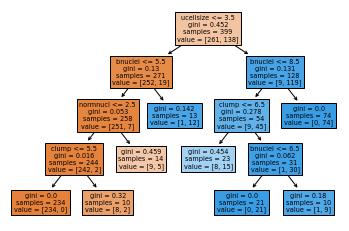

In [ ]:
#affichage graphique de l'arbre - depuis sklearn 0.21
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
from sklearn.tree import plot_tree
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True) #voi P18 cour pour valeur None
#L’outil affiche la description textuelle de l’arbre, puis sous sa forme graphique.

*=> Augmenter la taille d'affchage de l'arbre*

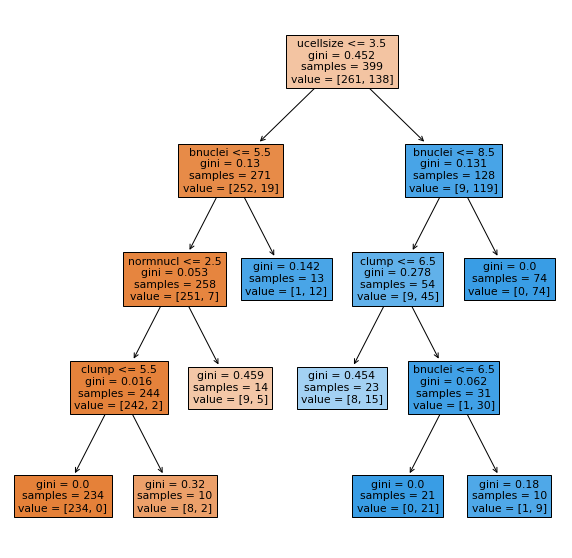

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)
plt.show()

5.   Affichage sous forme de règles imbriquées de l’arbre



In [ ]:
#affichage sous forme de règles
#plus facile à appréhender quand l'arbre est très grand
from sklearn.tree import export_text
tree_rules = export_text(arbreFirst,feature_names = list(df.columns[:-1]),show_weights=True)
print(tree_rules)

|--- ucellsize <= 3.50
|   |--- bnuclei <= 5.50
|   |   |--- normnucl <= 2.50
|   |   |   |--- clump <= 5.50
|   |   |   |   |--- weights: [234.00, 0.00] class: benign
|   |   |   |--- clump >  5.50
|   |   |   |   |--- weights: [8.00, 2.00] class: benign
|   |   |--- normnucl >  2.50
|   |   |   |--- weights: [9.00, 5.00] class: benign
|   |--- bnuclei >  5.50
|   |   |--- weights: [1.00, 12.00] class: malignant
|--- ucellsize >  3.50
|   |--- bnuclei <= 8.50
|   |   |--- clump <= 6.50
|   |   |   |--- weights: [8.00, 15.00] class: malignant
|   |   |--- clump >  6.50
|   |   |   |--- bnuclei <= 6.50
|   |   |   |   |--- weights: [0.00, 21.00] class: malignant
|   |   |   |--- bnuclei >  6.50
|   |   |   |   |--- weights: [1.00, 9.00] class: malignant
|   |--- bnuclei >  8.50
|   |   |--- weights: [0.00, 74.00] class: malignant



6.   Importance des variables




In [ ]:
#importance des variables
impVarFirst={"Variable":df.columns[:-1],"Importance":arbreFirst.feature_importances_}
print(pandas.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

<class 'dict'>
     Variable  Importance
1   ucellsize    0.819165
5     bnuclei    0.138616
0       clump    0.021660
7    normnucl    0.020559
2  ucellshape    0.000000
3  mgadhesion    0.000000
4      sepics    0.000000
6  bchromatin    0.000000
8     mitoses    0.000000


7.   Evaluation en test
    *   Prédiction en test






In [ ]:
#prédiction sur l'échantillon test
predFirst = arbreFirst.predict(X=dfTest.iloc[:,:-1])
#print(predFirst) #return list of element
#distribution des predictions
import numpy
print(numpy.unique(predFirst,return_counts=True))


(array(['benign', 'malignant'], dtype=object), array([199, 101]))



*   Matrice de confusion (pour évaluation des classifieurs)



In [ ]:
#matrice de confusion
from sklearn import metrics
print(metrics.confusion_matrix(dfTest.classe,predFirst))

[[191   6]
 [  8  95]]


*   Indicateurs de performances usuels



In [ ]:
#taux de reconnaissances – (189+93)/300
print(metrics.accuracy_score(dfTest.classe,predFirst))

0.9533333333333334


In [ ]:
#taux d'erreur – (10+8)/300
print(1.0 - metrics.accuracy_score(dfTest.classe,predFirst))

0.046666666666666634


In [ ]:
#rappel – sensibilité – 93/(10+93) {si ‘’classe = mailgnant’’ est la modalité cible}
print(metrics.recall_score(dfTest.classe,predFirst,pos_label='malignant'))

0.9223300970873787


In [ ]:
#précision – 93/(8+93)
print(metrics.precision_score(dfTest.classe,predFirst,pos_label='malignant'))

0.9405940594059405


In [ ]:
#F1-score = moyenne harmonique entre rappel et précision 
print(metrics.f1_score(dfTest.classe,predFirst,pos_label='malignant'))

0.9313725490196079


In [ ]:
#rapport de prédiction
print(metrics.classification_report(dfTest.classe,predFirst))

              precision    recall  f1-score   support

      benign       0.96      0.97      0.96       197
   malignant       0.94      0.92      0.93       103

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



8.   Modification des paramètres d’apprentissag



[Text(200.88000000000002, 181.2, 'ucellsize <= 3.5\ngini = 0.452\nsamples = 399\nvalue = [261, 138]'),
 Text(133.92000000000002, 108.72, 'bnuclei <= 5.5\ngini = 0.13\nsamples = 271\nvalue = [252, 19]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.053\nsamples = 258\nvalue = [251, 7]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(267.84000000000003, 108.72, 'gini = 0.131\nsamples = 128\nvalue = [9, 119]')]

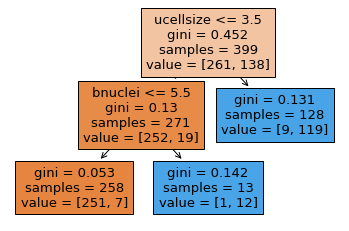

In [ ]:
#modifier les paramètres d'apprentissage
arbreSecond = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,max_leaf_nodes=3)
#construction de l'arbre
arbreSecond.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.classe)
#affichage graphique de l'arbre
plot_tree(arbreSecond,feature_names = list(df.columns[:-1]),filled=True)


In [ ]:
#prédiction sur l'échantillon test
predSecond = arbreSecond.predict(X=dfTest.iloc[:,:-1])
#matrice de confusion
print(metrics.confusion_matrix(dfTest.classe,predSecond))


[[191   6]
 [  8  95]]


In [ ]:
#taux de reconnaissance
print(metrics.accuracy_score(dfTest.classe,predSecond))

0.9533333333333334
